# Instituto Tecnológico y de Estudios Superiores de Monterrey
## MNA
## Ciencia y Analítica de Datos
### Práctica sobre Principal Component Analysis (PCA)
#### Profesor: Jobish Vallikavungal Devassia 
#### Alumno: Irvin Gomez Esquivel - A00361034
#### 11 de Octubre de 2022

# Parte 1: Ejercicio guiado 

## Limpieza de la información.

Vamos a tomar como referencia el dataset que hicimos en el trabajo en equipo de la semana pasada, pues en este proceso hacemos limpieza de datos, que será necesaria para el proceso de PCA, para efectos de este documento, tomaremos el código completo de la práctica anterior, para tener aquí desde inicio hasta el fin.

In [23]:
import pandas as pd


df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
df.head()


#Como en X2 (Gender) faltan datos, vamos a eliminar todos los rows que no tengan Gender:

df.dropna(subset=["X2"], inplace=True)
df.shape

#A continuación, para X3 (Education) vamos a llenar los vacíos con valor 4=others Haremos lo mismo para X4 (Martial Status) dond el valor 3 es others
df["X3"].fillna(value=4, inplace=True)
df["X4"].fillna(value=3, inplace=True)
df.isnull().any()


#Para X5 (Age) lo que vamos a hacer es llenar con la media
df['X5'].fillna(value = df.X5.mean(), inplace = True)
df.isnull().any()


#Para X6 a X11 lo que vamos a hacer es llenar los nulos con 0, porque el 0 es un valor que no está en la descripción de los datos y pareciera que es el valor default que se debe utilizar para los nulos.
df["X6"].fillna(value=0, inplace=True)
df["X7"].fillna(value=0, inplace=True)
df["X8"].fillna(value=0, inplace=True)
df["X9"].fillna(value=0, inplace=True)
df["X10"].fillna(value=0, inplace=True)
df["X11"].fillna(value=0, inplace=True)
df.isnull().any()


#Para las columnas X12 a X17 Amout of bill statement de los meses pasados así como para las columnas X18 a X23 Monto del pago pasado de los meses pasados también podemos definir que los nulos los podemos remplazar con 0, pues estamos hablando del monto del balance o de los pagos realizados.
for ix in range(12,24):
    df["X"+str(ix)].fillna(value=0, inplace=True)
df.isnull().any()


#Hasta este punto, la última columna que nos queda con nulos es la de la predicción del modelo Y, en este caso y considerando que son pocos renglones, lo mejor es eliminar esos registros del data frame
df.dropna(subset=["Y"], inplace=True)
df.isnull().any()

#quitamos el ID, que no es necesario para el análisis
df.drop('ID', inplace=True, axis=1)


df.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29996.000000,29996.000000,29996.000000,29996.000000,29996.000000,29996.000000,29996.000000,29996.000000,29996.000000,29996.000000,...,29996.000000,29996.000000,29996.000000,29996.000000,2.999600e+04,29996.000000,29996.000000,29996.000000,29996.000000,29996.000000
mean,167497.322310,1.603781,1.853147,1.551974,35.483862,-0.016769,-0.133818,-0.166522,-0.220829,-0.266302,...,43259.782471,40307.017702,38873.358481,5662.190725,5.921502e+03,5224.926557,4826.126017,4799.176990,5216.073076,0.221196
std,129750.786061,0.489119,0.790427,0.522026,9.217500,1.123727,1.197108,1.195859,1.168989,1.133008,...,64339.035974,60802.598983,59557.893788,16563.189672,2.304238e+04,17607.351892,15667.097055,15279.234839,17778.581176,0.415059
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2317.500000,1759.000000,1255.000000,1000.000000,8.327500e+02,390.000000,294.750000,250.000000,116.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18097.000000,17071.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54519.000000,50181.250000,49205.250000,5006.000000,5.000000e+03,4505.000000,4013.250000,4031.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Primero vamos a confirmar que sólo tenemos variables numéricas

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29996 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29996 non-null  int64  
 1   X2      29996 non-null  float64
 2   X3      29996 non-null  float64
 3   X4      29996 non-null  float64
 4   X5      29996 non-null  float64
 5   X6      29996 non-null  float64
 6   X7      29996 non-null  float64
 7   X8      29996 non-null  float64
 8   X9      29996 non-null  float64
 9   X10     29996 non-null  float64
 10  X11     29996 non-null  float64
 11  X12     29996 non-null  float64
 12  X13     29996 non-null  float64
 13  X14     29996 non-null  float64
 14  X15     29996 non-null  float64
 15  X16     29996 non-null  float64
 16  X17     29996 non-null  float64
 17  X18     29996 non-null  float64
 18  X19     29996 non-null  float64
 19  X20     29996 non-null  float64
 20  X21     29996 non-null  float64
 21  X22     29996 non-null  float64
 22

Ahora vamos a revisar la correlación entre las variables

In [25]:
df.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X1,1.000000,0.024691,-0.219218,-0.108328,0.144714,-0.271188,-0.296387,-0.286178,-0.267357,-0.249379,...,0.294012,0.295580,0.290352,0.195255,0.178390,0.210092,0.203225,0.217129,0.219578,-0.153512
X2,0.024691,1.000000,0.014199,-0.031702,-0.090769,-0.057702,-0.070855,-0.065953,-0.060031,-0.054986,...,-0.021855,-0.016989,-0.016773,-0.000123,-0.001392,-0.008531,-0.002219,-0.001640,-0.002797,-0.039919
X3,-0.219218,0.014199,1.000000,-0.143137,0.175071,0.105439,0.121645,0.114151,0.108938,0.097607,...,-0.000529,-0.007651,-0.009101,-0.037490,-0.030045,-0.039964,-0.038251,-0.040366,-0.037206,0.028085
X4,-0.108328,-0.031702,-0.143137,1.000000,-0.414060,0.019928,0.024254,0.032583,0.033122,0.035633,...,-0.023430,-0.025490,-0.021278,-0.005908,-0.008118,-0.003510,-0.012649,-0.001210,-0.006700,-0.024364
X5,0.144714,-0.090769,0.175071,-0.414060,1.000000,-0.039481,-0.050213,-0.053100,-0.049837,-0.053860,...,0.051360,0.049283,0.047660,0.025954,0.021765,0.029206,0.021342,0.022726,0.019475,0.013839
X6,-0.271188,-0.057702,0.105439,0.019928,-0.039481,1.000000,0.672062,0.574360,0.538801,0.509227,...,0.179109,0.180602,0.177007,-0.079226,-0.070088,-0.070450,-0.063974,-0.058129,-0.058668,0.324749
X7,-0.296387,-0.070855,0.121645,0.024254,-0.050213,0.672062,1.000000,0.766688,0.662072,0.622691,...,0.222235,0.221248,0.219436,-0.080672,-0.058976,-0.055803,-0.046833,-0.037006,-0.036495,0.263552
X8,-0.286178,-0.065953,0.114151,0.032583,-0.053100,0.574360,0.766688,1.000000,0.776625,0.685982,...,0.227387,0.225251,0.222516,0.001206,-0.066783,-0.053283,-0.046018,-0.035803,-0.035836,0.235549
X9,-0.267357,-0.060031,0.108938,0.033122,-0.049837,0.538801,0.662072,0.776625,1.000000,0.819909,...,0.245996,0.242909,0.239237,-0.009325,-0.001910,-0.069175,-0.043409,-0.033607,-0.026535,0.216456
X10,-0.249379,-0.054986,0.097607,0.035633,-0.053860,0.509227,0.622691,0.685982,0.819909,1.000000,...,0.271763,0.269550,0.262370,-0.006098,-0.003197,0.009019,-0.058276,-0.033347,-0.023012,0.203955


Como no es tan fácil analizar la gráfica de correlación en modo numérico, lo que haremos es graficarla para facilitar su análisis:

<AxesSubplot: >

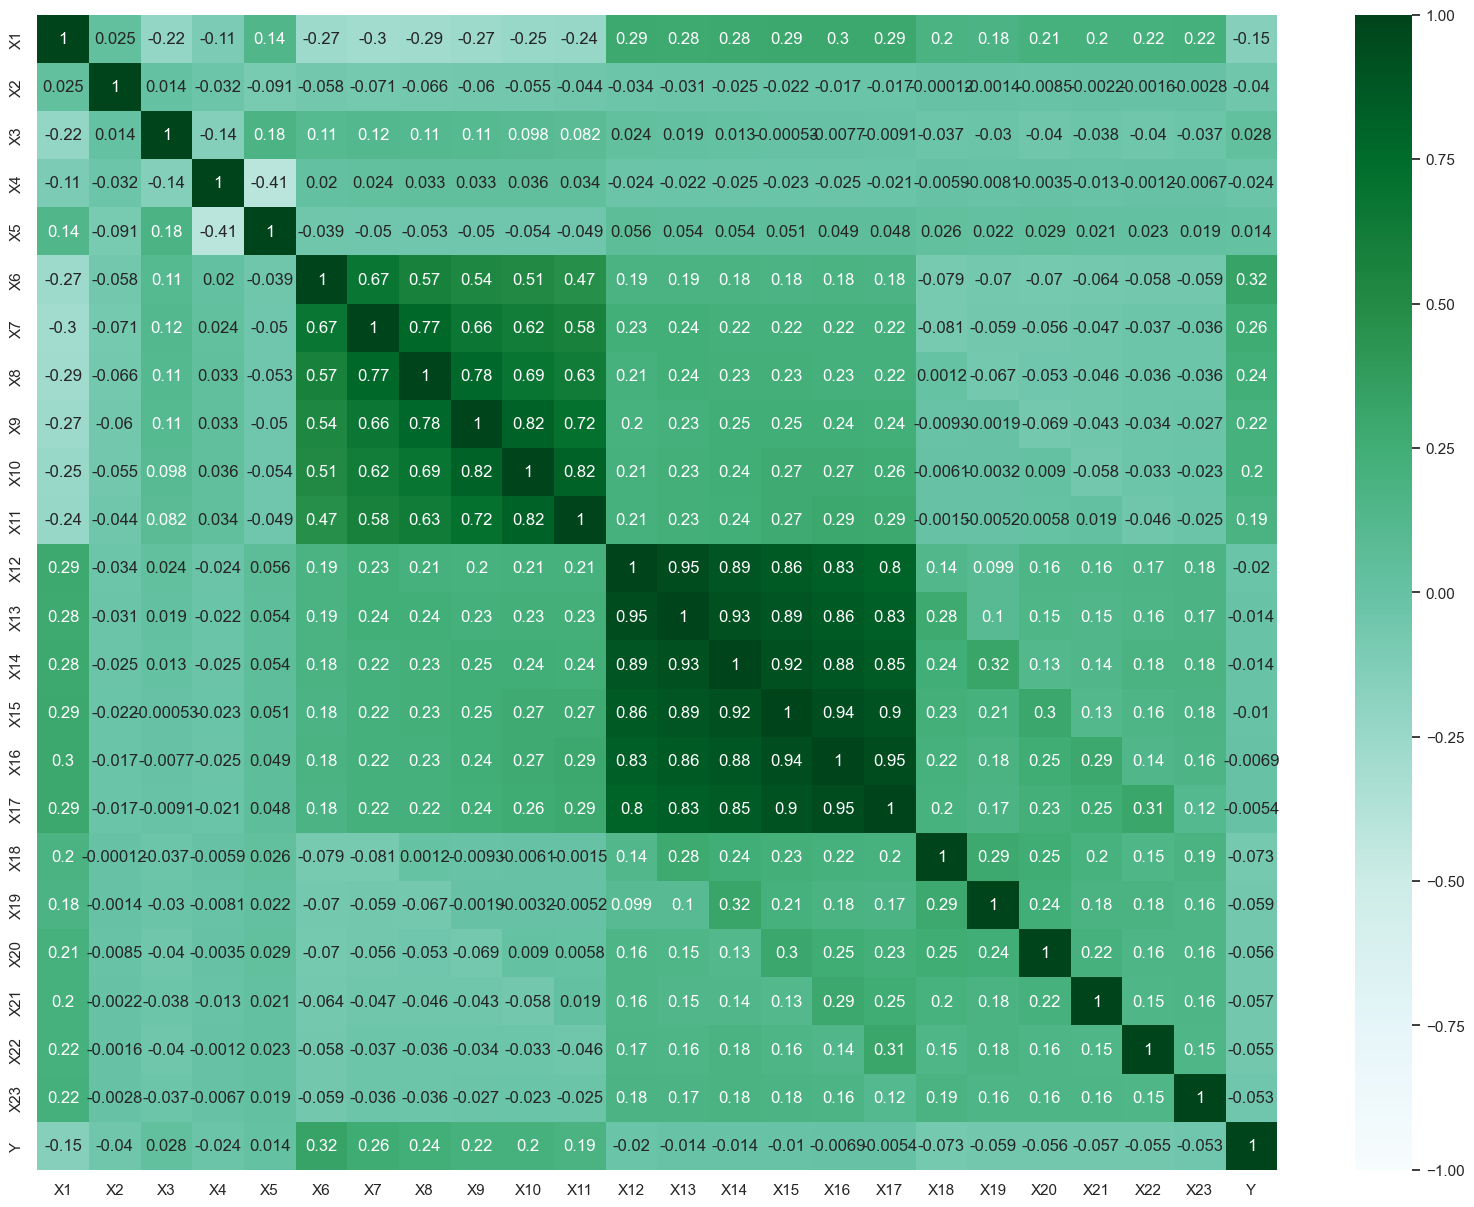

In [26]:
import seaborn as sns

corrs = df.corr()

sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

En la gráfica anterior, podemos ver como las correlaciones más altas están entre X12 y X13 (Monto del saldo de Septiembre y Agosto 2005) asó como X16 y X17 (Monto del Saldo en Abril y Mayo 2005). También notamos una pequeña correlación negativa entre X4 (Estado civil) y X5 (Edad), vale la pena incluir esas variables también en el análisis.

In [27]:
cols = ["X4", "X5", "X12", "X13", "X16", "X17"]

summary = {
    "Varianzas": df[cols].var()[0:6],
    "Valor Min": df[cols].min()[0:6],
    "Valor Max": df[cols].max()[0:6]
}

pd.DataFrame(summary, index = cols).transpose()

,X4,X5,X12,X13,X16,X17
Varianzas,0.272511,84.9623,5.423049e+09,5.066535e+09,3.696956e+09,3.547143e+09
Valor Min,0.000000,21.0000,-1.655800e+05,-6.977700e+04,-8.133400e+04,-3.396030e+05
Valor Max,3.000000,79.0000,9.645110e+05,9.839310e+05,9.271710e+05,9.616640e+05


Vamos a revisar qué porcentaje de Varianza corresponde a cada una de las variables

In [28]:
#varianza total de todas las variables
t = df.var().sum()

var_X4 = df.X4.var()
var_X5 = df.X5.var()
var_X12 = df.X12.var()
var_X13 = df.X13.var()
var_X16 = df.X16.var()
var_X17 = df.X17.var()

print('Varianza Total \t\t:',t.round(2) )
print('Varianza X4(Estado Civil) \t:', ((var_X4/t)*100).round(2),'%' )
print('Varianza X5(Edad) \t\t:', ((var_X5/t)*100).round(2),'%' )
print('Varianza X12(Saldo Septiembre) \t:', ((var_X12/t)*100).round(2),'%' )
print('Varianza X13(Saldo Agosto) \t:', ((var_X13/t)*100).round(2),'%' )
print('Varianza X16(Saldo Mayo) \t:', ((var_X16/t)*100).round(2),'%' )
print('Varianza X17(Saldo Abril) \t:', ((var_X17/t)*100).round(2),'%' )

Varianza Total 		: 45428911161.98
Varianza X4(Estado Civil) 	: 0.0 %
Varianza X5(Edad) 		: 0.0 %
Varianza X12(Saldo Septiembre) 	: 11.94 %
Varianza X13(Saldo Agosto) 	: 11.15 %
Varianza X16(Saldo Mayo) 	: 8.14 %
Varianza X17(Saldo Abril) 	: 7.81 %


Como los saldos son números muy grandes comparados con los valores de Estado Civil y Edad, entonces vamos a necesitar normalizarlos para que estén en una escala que pueda ser comparable

In [29]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
normalized = scaler.fit_transform(df)

normalized

array([[-1.13679297,  0.81008087,  0.18579248, ..., -0.31410323,
        -0.29339574,  1.87639925],
       [-0.36607188,  0.81008087,  0.18579248, ..., -0.31410323,
        -0.18089895,  1.87639925],
       [-0.59728821,  0.81008087,  0.18579248, ..., -0.24865383,
        -0.01215376, -0.53293562],
       ...,
       [-1.05972086, -1.23444465,  0.18579248, ..., -0.18320444,
        -0.11902572,  1.87639925],
       [-0.67436031, -1.23444465,  1.45095283, ...,  3.1523585 ,
        -0.19192364,  1.87639925],
       [-0.90557664, -1.23444465,  0.18579248, ..., -0.24865383,
        -0.23714735,  1.87639925]])

Vamos a convertir los datos normalizados a dataframe para poder analizarlos más facilmente

In [30]:
n_df = pd.DataFrame(normalized, columns=df.columns)
n_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,-1.136793,0.810081,0.185792,-1.057386,-1.245897,1.794744,1.782507,-0.696981,-0.666545,-1.530198,...,-0.672383,-0.662927,-0.652710,-0.341860,-0.227085,-0.296752,-0.308047,-0.314103,-0.293396,1.876399
1,-0.366072,0.810081,0.185792,0.858260,-1.028915,-0.874988,1.782507,0.139251,0.188909,0.235044,...,-0.621527,-0.606103,-0.597955,-0.341860,-0.213588,-0.239956,-0.244218,-0.314103,-0.180899,1.876399
2,-0.597288,0.810081,0.185792,0.858260,-0.160986,0.014923,0.111786,0.139251,0.188909,0.235044,...,-0.449638,-0.417078,-0.391632,-0.250209,-0.191889,-0.239956,-0.244218,-0.248654,-0.012154,-0.532936
3,-0.905577,0.810081,0.185792,-1.057386,0.164487,0.014923,0.111786,0.139251,0.188909,0.235044,...,-0.232301,-0.186640,-0.156596,-0.221108,-0.169365,-0.228597,-0.237835,-0.244138,-0.237147,-0.532936
4,-0.905577,-1.234445,0.185792,-1.057386,2.334309,-0.874988,0.111786,-0.696981,0.188909,0.235044,...,-0.346915,-0.348034,-0.331487,-0.221108,1.334932,0.271202,0.266415,-0.269009,-0.255203,-0.532936


Volvemos a comparar, pero ahora sobre el dataframe normalizado

In [31]:
summary = {
    "Varianzas": n_df[cols].var()[0:6],
    "Valor Min": n_df[cols].min()[0:6],
    "Valor Max": n_df[cols].max()[0:6]
}

pd.DataFrame(summary, index = cols).transpose()

,X4,X5,X12,X13,X16,X17
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033
Valor Min,-2.973031,-1.571370,-2.944095,-1.671221,-2.000622,-6.354870
Valor Max,2.773905,4.721114,12.402035,13.132537,14.586198,15.494269


Ahora que nuestros datos están normalizados, vamos a aplicar PCA

In [32]:
from sklearn.decomposition import PCA


pca = PCA()

pca_trasnformado = pca.fit_transform(n_df)

pca_trasnformado

array([[-1.80084039e+00, -1.27024752e+00, -5.90386954e-01, ...,
         1.60558433e-02,  1.59084318e-02,  1.06082305e-02],
       [-6.71534599e-01, -2.40656962e+00,  1.04031870e+00, ...,
         3.33892941e-03,  3.44635547e-03,  6.39853083e-03],
       [-8.58437953e-01, -9.69872594e-01,  4.69985289e-01, ...,
        -7.86959021e-02, -4.06478095e-02, -5.65995342e-02],
       ...,
       [ 4.66076014e-01, -3.61059600e+00,  5.01427536e-01, ...,
         1.52689976e-02, -1.25333720e-02, -2.10248440e-02],
       [ 7.19200966e-01,  3.83367016e-01,  3.28379126e-01, ...,
         1.77282446e-01, -1.43788855e-01, -9.48342705e-03],
       [-6.25404899e-02, -1.13622064e+00, -1.44369340e+00, ...,
        -2.20389614e-02,  1.14767947e-01, -4.82601692e-02]])

## Paso 1 - Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

In [33]:
import numpy as np

pcaSummary_df = pd.DataFrame({
                             'varianza': np.round(pca.explained_variance_ratio_,4) * 100,
                             'varianza acumulada': np.cumsum(pca.explained_variance_ratio_) * 100
                             })

pcaSummary_df



,varianza,varianza acumulada
0,27.30,27.297941
1,17.50,44.801842
2,6.47,51.272625
3,6.15,57.418410
4,4.34,61.753691
5,4.06,65.814290
6,3.82,69.631672
7,3.78,73.410986
8,3.69,77.103518
9,3.63,80.733639



Hasta aquí vemos que los primeros 11 componentes (desde 0 hasta 10) son los que definen el 83% de la varianza.

Nos vamos a enfocar en esos componentes. 

## Paso 2: Interprete cada componente principal en términos de las variables originales

Ahora vamos a encontrar el peso de cada variable original dentro de los componentes.

In [34]:
componentes = pd.DataFrame(
    pca.components_.round(4), # peso de cada uno de los componentes
    index = n_df.columns) #variables originales


componentes.iloc[:,:11]

,0,1,2,3,4,5,6,7,8,9,10
X1,0.0657,-0.0220,0.0198,-0.0056,0.0140,0.1645,0.1973,0.2032,0.2099,0.2135,0.2088
X2,0.3116,0.0308,-0.0886,-0.0397,0.0627,-0.2967,-0.3280,-0.3349,-0.3345,-0.3213,-0.2959
X3,0.0100,0.0276,-0.3169,0.4665,-0.4767,-0.0208,0.0188,0.0638,0.0922,0.1121,0.1142
X4,0.0770,-0.0792,0.2275,-0.4303,0.4485,0.0202,0.0478,0.0798,0.1036,0.1099,0.1045
X5,-0.1984,0.7375,0.4512,-0.0265,-0.1389,-0.1122,-0.0520,-0.0023,0.0381,0.0555,0.0637
X6,-0.2657,-0.6277,0.3902,0.2314,0.0054,-0.1354,-0.0618,-0.0168,0.0068,0.0181,0.0103
X7,-0.2630,0.0075,0.4116,0.1899,-0.1402,0.2180,0.0434,-0.0888,-0.1962,-0.2350,-0.2335
X8,0.0450,0.0736,-0.3146,-0.1193,0.0481,-0.0247,-0.0800,-0.0454,-0.0138,0.0425,0.0810
X9,-0.0263,-0.0471,0.0540,0.0105,0.0073,-0.0359,0.0052,-0.0078,-0.0146,0.0136,0.0934
X10,0.0222,0.0175,-0.1549,-0.0561,0.0473,-0.0326,-0.0338,-0.0110,0.0456,0.0560,0.0011


Ahora vamos a obtener los máximos por filas, el máximo representa la variable que tiene más peso dentro de cada componente. Utilizamos el valor absoluto porque mientras más grande sea la diferencia con 0, más importante es para el peso.

In [35]:
componentes.iloc[:,:11].abs().idxmax() 

0     X15
1      X5
2      X5
3     X14
4     X14
5     X16
6     X17
7     X19
8     X17
9     X20
10    X17
dtype: object

In [43]:
# Con este encontramos cuales son las variables originales que tienen menor peso
componentes.iloc[:,:11].abs().idxmin() 

0     X23
1     X17
2     X22
3     X22
4     X23
5       Y
6       Y
7      X5
8       Y
9       Y
10    X23
dtype: object

Tomando en cuenta que X5 es Edad y que X12 a X17 es el saldo del crédito de Abril a Septiembre, podemos decir que los factores más determinantes o de más peso son la edad y el saldo del crédito.

Sin embargo vamos a:

## Paso 3: Identifique valores atípicos


{'whiskers': [<matplotlib.lines.Line2D at 0x14279373790>,
 'caps': [<matplotlib.lines.Line2D at 0x14279373cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x142793734f0>,
 'medians': [<matplotlib.lines.Line2D at 0x14279378130>,
 'fliers': [<matplotlib.lines.Line2D at 0x14279378670>,
 'means': [<matplotlib.lines.Line2D at 0x142793783d0>,
  <matplotlib.lines.Line2D at 0x142793e4250>]}

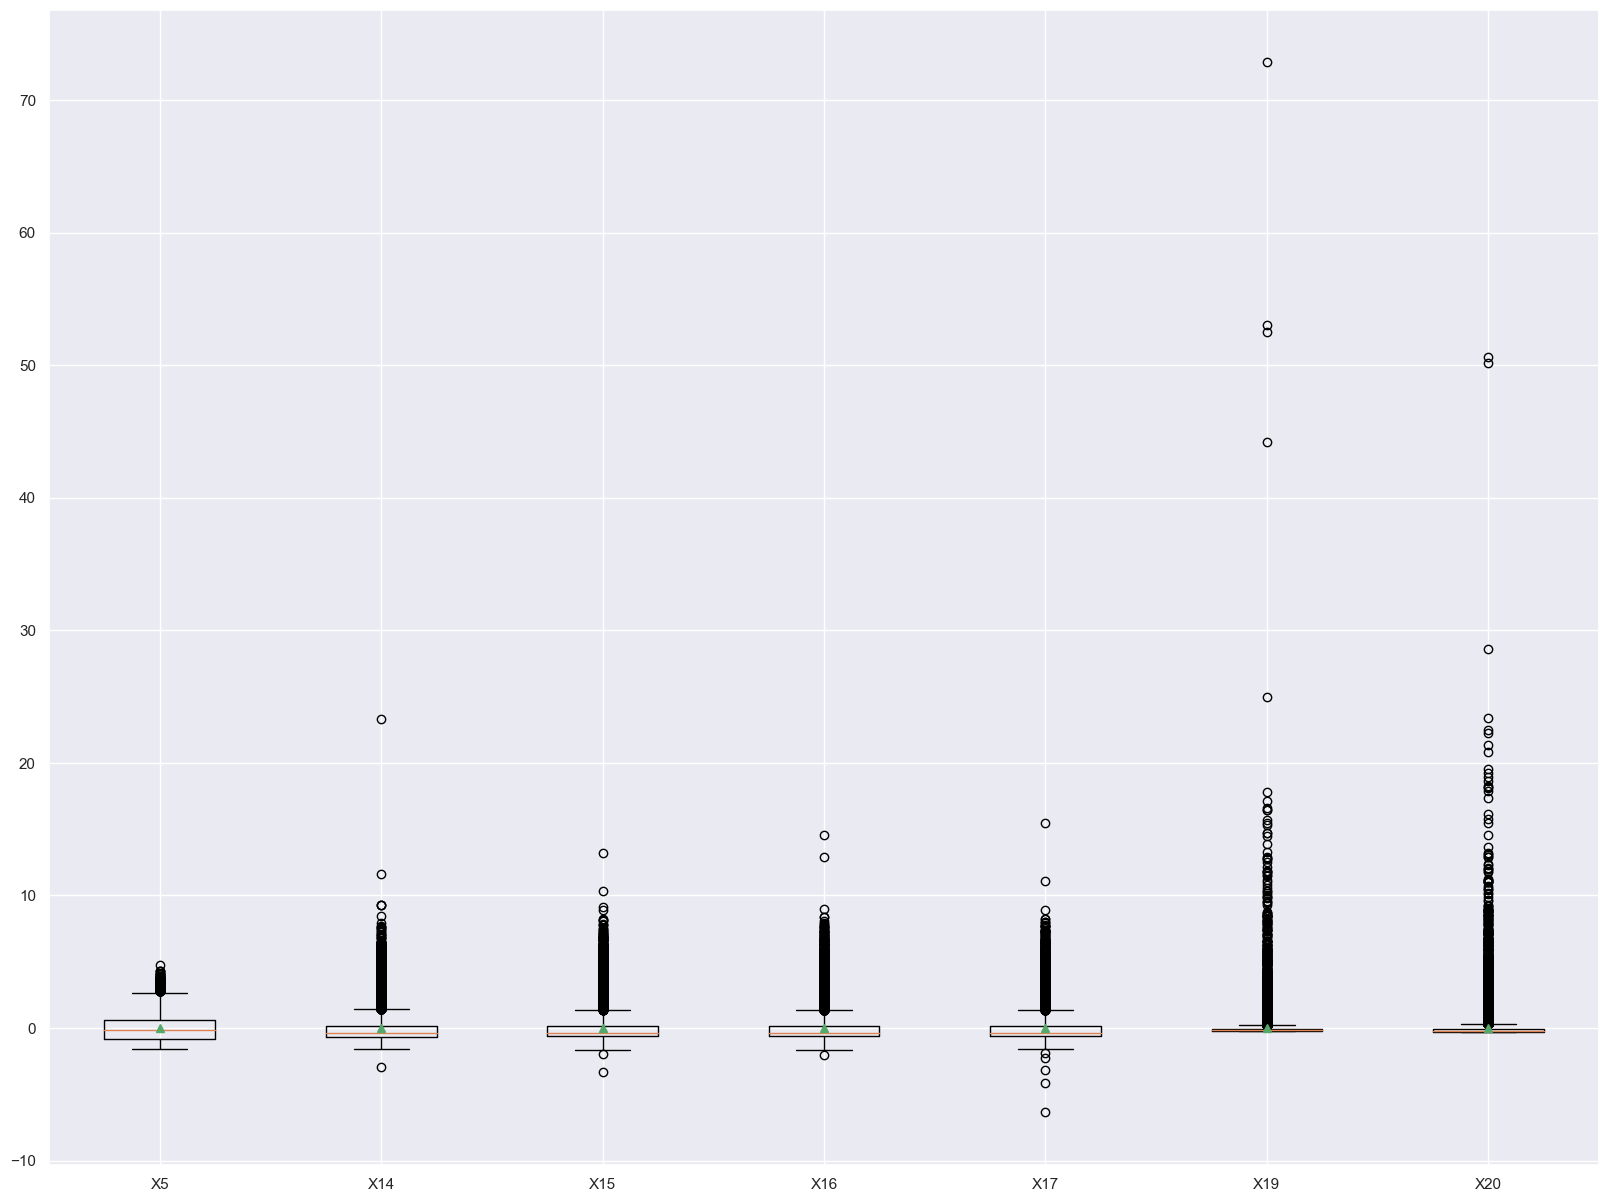

In [42]:
import matplotlib.pyplot as plt

copy_for_plot = n_df.copy()

copy_for_plot.drop('X1', inplace=True, axis=1)
copy_for_plot.drop('X2', inplace=True, axis=1)
copy_for_plot.drop('X3', inplace=True, axis=1)
copy_for_plot.drop('X4', inplace=True, axis=1)
copy_for_plot.drop('X6', inplace=True, axis=1)
copy_for_plot.drop('X7', inplace=True, axis=1)
copy_for_plot.drop('X8', inplace=True, axis=1)
copy_for_plot.drop('X9', inplace=True, axis=1)
copy_for_plot.drop('X10', inplace=True, axis=1)
copy_for_plot.drop('X11', inplace=True, axis=1)
copy_for_plot.drop('X12', inplace=True, axis=1)
copy_for_plot.drop('X13', inplace=True, axis=1)
copy_for_plot.drop('X18', inplace=True, axis=1)
copy_for_plot.drop('X21', inplace=True, axis=1)
copy_for_plot.drop('X22', inplace=True, axis=1)
copy_for_plot.drop('X23', inplace=True, axis=1)
copy_for_plot.drop('Y', inplace=True, axis=1)

plt.boxplot(copy_for_plot, labels=copy_for_plot.columns, showmeans=True)

De la gráfica anterior podemos que es X5 (Edad) es la que tiene menos datos atípicos (outliers). Todas las demás tienen más valores atípicos.

# Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

## ¿Cuál es el número de componentes mínimo y por qué?
> Después de hacer el análisis, pudimos identificar que los 11 componentes con mayor varianza representan el 83.99% de la varianza total del dataset, con una varianza superior al 80% podemos decir que tenemos una muestra representativa suficientemente confiable para llevar a cabo el análisis.
## ¿Cuál es la variación de los datos que representan esos componentes?
> Representan el 83.99% de la varianza total del dataset.
## ¿Cuál es la pérdida de información después de realizar PCA?
> Considerando que los primeros 11 componentes seleccionados representan el 83.99% de la varianza, podemos decir que la pérdida de información de realizar el PCA implica perder el 16.01% de la información. Sin embargo, considerando que el dataset original tenía 24 variables y sólo estamos considerando 11 componentes, entonces reducimos en gran medida la cantidad de información a analizar sin perder una proporción considerable de la información.
## De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
> X5 Edad es la que tiene mayor importancia en los componentes principales
> X23 es la variable origina que tiene menor importancia en los componentes principales
## ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
> Se recomienda usar Principal Component Analysis (PCA) cuando se tienen múltiples variables a analizar y se necesita reducir la cantidad de variables y condensarlos en unos pocos componentes sin perder una proporción considerable de la información. Esto permite llegar a modelos predictivos más sencillos y nos permite también identificar las variables que tienen más peso para la varianza del modelo, permitiéndonos concentrarnos en ellas y no generar ruido al considerar las variables que tienen poca importancia o peso.

## Referencias:
> Harrell, R. (2017). An Introduction to Statistical Learning. Van Haren Publishing.
> Jafari, R. (2022). Hands-On Data Preprocessing in Python: Learn How to Effectively Prepare Data for Successful Data Analytics. Van Haren Publishing.
> Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. Van Duuren Media.
